# Exploritory Analysis Ⅰ

Exploritory Analysis of the Datasets to be used for <br>
Machine Learning Predictions of Exoplanet candidates <br>

The analyis will look briefly at:
- The Confirmed Planets datset being used.
- The main features of the dataset
- If any of the features will be needed for the Classification Machine Learning


In [1]:
#imports
import pandas as pd
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
import seaborn as sn

### Kepler Confirmed Exoplanets

Kepler confirmed exoplanets are downloaded from through the MAST API and give details <br>
on the exoplanet such as the star name it orbits, the star mass, brightness, and the orbital <br>
period of the confirmed exoplanet

In [2]:
# data downloaded in csv format from API query string given by MAST
confirmed_file=("https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+pscomppars&format=csv")


# dataframe object of the csv
confirmed_df = pd.read_csv(confirmed_file, low_memory=False)

In [3]:
# basic details on the dataframe
confirmed_df.shape

(4884, 373)

The dataframe contains 4,884 rows and 373 columns

In [4]:
# print first 5 rows of dataset
confirmed_df.head()

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,...,sy_pmstr,sy_pm_reflink,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,x,y,z,htm20
0,OGLE-2016-BLG-1227L b,b,OGLE-2016-BLG-1227L,NaN,NaN,NaN,2020-03,2020,Microlensing,Ground,...,NaN,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...,NaN,NaN,NaN,NaN,-0.063824,-0.828921,-0.555712,-768415656
1,GJ 480 b,b,GJ 480,NaN,HIP 61706,TIC 399119319,2020-08,2020,Radial Velocity,Ground,...,1182.6515022&plusmn;0.1711173,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,-1155.70000,0.172518,-0.172518,-1155.700000&plusmn;0.172518,-0.965202,-0.165218,0.202703,669768942
2,Kepler-276 c,c,Kepler-276,NaN,NaN,TIC 138213510,2014-02,2013,Transit,Space,...,8.0702604&plusmn;0.0515101,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,7.99553,0.051581,-0.051581,7.9955300&plusmn;0.0515805,0.310575,-0.711954,0.629813,1302657699
3,Kepler-829 b,b,Kepler-829,NaN,NaN,TIC 123451768,2016-05,2016,Transit,Space,...,8.3089089&plusmn;0.0412978,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,7.93777,0.040833,-0.040833,7.9377700&plusmn;0.0408326,0.157566,-0.720680,0.675124,-792260935
4,K2-283 b,b,K2-283,NaN,NaN,TIC 266017624,2018-12,2018,Transit,Space,...,11.1101761&plusmn;0.0531852,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,-10.97340,0.053624,-0.053624,-10.9734000&plusmn;0.0536244,0.959702,0.224997,0.168368,609813555


In [5]:
# basic details on the dataframe
confirmed_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 373 columns):
 #    Column                Dtype  
---   ------                -----  
 0    pl_name               object 
 1    pl_letter             object 
 2    hostname              object 
 3    hd_name               object 
 4    hip_name              object 
 5    tic_id                object 
 6    disc_pubdate          object 
 7    disc_year             int64  
 8    discoverymethod       object 
 9    disc_locale           object 
 10   disc_facility         object 
 11   disc_instrument       object 
 12   disc_telescope        object 
 13   disc_refname          object 
 14   ra                    float64
 15   rastr                 object 
 16   dec                   float64
 17   decstr                object 
 18   glon                  float64
 19   glat                  float64
 20   elon                  float64
 21   elat                  float64
 22   ra_reflink            

Columns from the dataset that are of use to this project <br>
From the documentation at: https://exoplanetarchive.ipac.caltech.edu/TAP/tables and https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html are:

__pl_name__ : Char<br>
The planet name
 <br>
  <br>
__pl_letter__ : Char<br>
The planet lettering system (single aplphabetical digit)
 <br>
  <br>
__hostname__ : Char<br>
The host(Star) name for the planet discovered 
 <br>
  <br>
__tic_id__ : Char<br>
The target identification number, for use downloading the specific Pixel Image data
 <br>
  <br>
__disc_pubdate__ : Char<br>
When the discovered planet was published
 <br>
  <br>
__disc_year__ : int<br>
The year the planet was discovered
 <br>
  <br>
__discoverymethod__ : Char<br>
The method used to discover the planet, Transit Microlensing etc,,
 <br>
  <br>
__disc_locale__ : Char<br>
From where the discovery was made, from the ground or from space
 <br>
  <br>
__disc_facility__ : Char<br> 
The facility that was incharge of the instrument that made the discovery
 <br>
  <br>
__disc_instrument__ : Char<br>
The type of instrument used, For Kepler it is the Kepler CCD Array
 <br>
  <br>
__disc_telescope__ : Char<br>
The name of the telescope, or camera that made the discovery
 <br>
  <br>
__pl_orbper__ : double<br>
Is the orbital period of the planet discovered
 <br>
  <br>
__pl_eqt__ : double <br>
The equilibrium temperature (Kelvin) of the planet discovered
 <br>
  <br>
__pl_dens__ : double<br>
The density (g/cm3) of the planet discovered
 <br>
  <br>
__pl_trandur__ : double<br>
The tranist duration in days
 <br>
  <br>
__pl_radj__ : double <br>
The discovered planets Juptier Radius
 <br>
  <br>
__pl_rade__ : double<br>
The discovered planets Earth Radius
 <br>
  <br>
__pl_bmasse__ : double <br>
The discovered planets Earth mass (Planet Mass.sin(i)/sin(i))
 <br>
  <br>
__st_age__ : double<br>
The stellar age in Gyr
 <br>
  <br> 
__st_mass__ : double<br>
The Stellar Mass (Solar Mass)
 <br>
  <br>
__tran_flag__ : int<br>
Detected by Transits
 <br>
  <br>
__sy_dist__ : double<br>
The system distance in (pc) Parsec approx 3.26 light-years
 <br>
  <br>


From the 373 initial columns the above columns will give some additional insights <br>
into the discovery of exoplanets by during the Kepler mission. <br>

Although another data set containing the Kepler ID (KIC) will be used to download the pixel images<br>
needed for the flux readings, this dataset will be used to lable and verify the positive confirmations.<br>

In [6]:
# Reindex only the columns of possible interest to the initial exploritory analysis
confirmed_df = confirmed_df.reindex(columns=['pl_name','pl_letter','hostname','tic_id','disc_pubdate','disc_year',
                              'discoverymethod','disc_locale','disc_facility','disc_instrument',
                              'disc_telescope','pl_orbper','pl_eqt','pl_dens','pl_trandur','pl_radj',
                              'pl_rade','pl_bmasse','st_age','st_mass','tran_flag','sy_dist' ])

confirmed_df

,pl_name,pl_letter,hostname,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,disc_facility,disc_instrument,...,pl_eqt,pl_dens,pl_trandur,pl_radj,pl_rade,pl_bmasse,st_age,st_mass,tran_flag,sy_dist
0,OGLE-2016-BLG-1227L b,b,OGLE-2016-BLG-1227L,NaN,2020-03,2020,Microlensing,Ground,OGLE,OGLE CCD Array,...,NaN,0.512,NaN,1.240,13.900,250.00000,NaN,0.10,0,NaN
1,GJ 480 b,b,GJ 480,TIC 399119319,2020-08,2020,Radial Velocity,Ground,Multiple Observatories,Multiple Instruments,...,NaN,1.440,NaN,0.330,3.690,13.20000,NaN,0.45,0,14.2358
2,Kepler-276 c,c,Kepler-276,TIC 138213510,2014-02,2013,Transit,Space,Kepler,Kepler CCD Array,...,563.0,3.740,5.09900,0.259,2.900,16.60000,0.40,1.10,1,1144.8600
3,Kepler-829 b,b,Kepler-829,TIC 123451768,2016-05,2016,Transit,Space,Kepler,Kepler CCD Array,...,857.0,2.980,2.24420,0.188,2.110,5.10000,4.68,0.98,1,1073.7600
4,K2-283 b,b,K2-283,TIC 266017624,2018-12,2018,Transit,Space,K2,Kepler CCD Array,...,1186.0,1.540,1.74960,0.314,3.520,12.20000,NaN,0.89,1,402.9150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,2M0437 b,b,2M0437,TIC 125843782,2021-10,2021,Imaging,Ground,Subaru Telescope,Infrared Camera and Spectrograph (IRCS),...,1450.0,3.180,NaN,1.160,13.000,1271.31363,2.50,0.17,0,128.4840
4880,HATS-74 A b,b,HATS-74 A,TIC 219189765,2021-12,2021,Transit,Ground,HATSouth,Apogee 4K CCD Sensor,...,895.1,1.640,1.65336,1.032,11.568,464.02947,11.00,0.60,1,299.3890
4881,HATS-75 b,b,HATS-75,TIC 44737596,2021-12,2021,Transit,Ground,HATSouth,Apogee 4K CCD Sensor,...,772.3,0.878,1.91256,0.884,9.909,156.05375,14.90,0.60,1,194.9640
4882,HATS-76 b,b,HATS-76,TIC 170849515,2021-12,2021,Transit,Ground,HATSouth,Apogee 4K CCD Sensor,...,939.8,2.580,1.85760,1.079,12.094,835.57088,4.60,0.66,1,385.6890


In [7]:
# simple desciptive statistics of the new dataframe
confirmed_df.describe()

,disc_year,pl_orbper,pl_eqt,pl_dens,pl_trandur,pl_radj,pl_rade,pl_bmasse,st_age,st_mass,tran_flag,sy_dist
count,4884.000000,4.726000e+03,3710.000000,4779.000000,3638.000000,4868.000000,4870.000000,4862.000000,3971.000000,4880.000000,4884.000000,4869.000000
mean,2015.251229,8.863196e+04,909.615374,4.278715,3.929477,0.492018,5.512160,437.268038,4.360688,0.962779,0.774161,665.520604
std,4.114448,5.849702e+06,456.408995,22.959142,2.647875,0.472840,5.298701,3949.936636,3.043127,0.430406,0.418177,922.451942
min,1989.000000,9.070629e-02,50.000000,0.030000,0.112700,0.026000,0.296000,0.020000,0.000000,0.010000,0.000000,1.301190
25%,2014.000000,4.488917e+00,571.250000,1.460000,2.292250,0.155000,1.731000,3.860000,2.400000,0.800000,1.000000,141.731000
50%,2016.000000,1.161783e+01,817.500000,2.590000,3.270500,0.241000,2.700000,8.200000,3.980000,0.950000,1.000000,457.125000
75%,2018.000000,3.978237e+01,1141.750000,4.570000,4.797750,0.995750,11.147500,131.502162,5.130000,1.090000,1.000000,869.236000
max,2021.000000,4.020000e+08,4050.000000,1290.000000,53.600000,6.900000,77.342000,239000.000000,14.900000,10.940000,1.000000,8500.000000


In [8]:
# simple desciptive statistics of the new dataframe
confirmed_df.dtypes

pl_name             object
pl_letter           object
hostname            object
tic_id              object
disc_pubdate        object
disc_year            int64
discoverymethod     object
disc_locale         object
disc_facility       object
disc_instrument     object
disc_telescope      object
pl_orbper          float64
pl_eqt             float64
pl_dens            float64
pl_trandur         float64
pl_radj            float64
pl_rade            float64
pl_bmasse          float64
st_age             float64
st_mass            float64
tran_flag            int64
sy_dist            float64
dtype: object

In [9]:
# simple desciptive statistics of the new dataframe
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          4884 non-null   object 
 1   pl_letter        4884 non-null   object 
 2   hostname         4884 non-null   object 
 3   tic_id           4751 non-null   object 
 4   disc_pubdate     4884 non-null   object 
 5   disc_year        4884 non-null   int64  
 6   discoverymethod  4884 non-null   object 
 7   disc_locale      4884 non-null   object 
 8   disc_facility    4884 non-null   object 
 9   disc_instrument  4884 non-null   object 
 10  disc_telescope   4884 non-null   object 
 11  pl_orbper        4726 non-null   float64
 12  pl_eqt           3710 non-null   float64
 13  pl_dens          4779 non-null   float64
 14  pl_trandur       3638 non-null   float64
 15  pl_radj          4868 non-null   float64
 16  pl_rade          4870 non-null   float64
 17  pl_bmasse     

### Discovery Methods & Discovery Telescopes

Checking the discovery methods for expolanets. The Machine learning aspect<br>
of the project will focus on the Transit method discovered by the Kepler Telescope.

In [10]:
# group and counting planets by discovery method
disc_method = confirmed_df.copy()
disc_method = disc_method.groupby(['discoverymethod'])['pl_name'].count()
disc_method = disc_method.to_frame()
disc_method.reset_index(inplace=True)
disc_method.rename(columns={'pl_name':'count'}, inplace=True)
disc_method['%'] = (disc_method['count'] / disc_method['count'].sum())*100
disc_method

,discoverymethod,count,%
0,Astrometry,1,0.020475
1,Disk Kinematics,1,0.020475
2,Eclipse Timing Variations,16,0.327600
3,Imaging,55,1.126126
4,Microlensing,120,2.457002
5,Orbital Brightness Modulation,9,0.184275
6,Pulsar Timing,7,0.143325
7,Pulsation Timing Variations,2,0.040950
8,Radial Velocity,899,18.407043
9,Transit,3752,76.822277


Checking to see which instrunments have discovered how many exoplanets

In [11]:
# group and counting planets by discovery instrument
disc_telescope = confirmed_df.copy()
disc_telescope = disc_telescope.groupby(['disc_telescope'])['pl_name'].count()
disc_telescope = disc_telescope.to_frame()
disc_telescope.reset_index(inplace=True)
disc_telescope.rename(columns={'pl_name':'count'}, inplace=True)
disc_telescope['%'] = (disc_telescope['count'] / disc_telescope['count'].sum())*100
disc_telescope = disc_telescope.sort_values(by='%', ascending=False)
disc_telescope.reset_index(drop= True, inplace=True)
disc_telescope

,disc_telescope,count,%
0,0.95 m Kepler Telescope,3180,65.110565
1,Canon 200mm f/1.8L,222,4.545455
2,Multiple Telescopes,217,4.443079
3,3.6 m ESO Telescope,200,4.095004
4,0.1 m TESS Telescope,175,3.583129
...,...,...,...
70,6.5 m Magellan I Baade Telescope,1,0.020475
71,1.55 m Wyeth Telescope,1,0.020475
72,4.20 m William Herschel Telescope,1,0.020475
73,4 m ESO Vista Telescope,1,0.020475


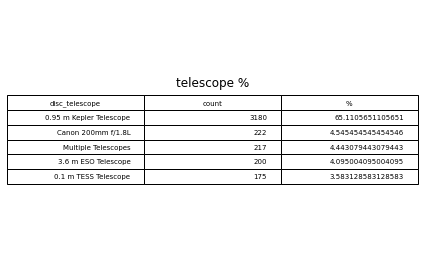

In [58]:
table_1 = disc_telescope.copy()
table_1 = table_1.iloc[:5]


# plot a table
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=table_1.values, colLabels = table_1.columns, loc='center')

# disply and save the table
name = "telescope %"
plt.title(name, y=1.0, pad=-80)
fig.tight_layout()
plt.savefig('./graphs/disc_telescope_percent.jpg', bbox_inches="tight", dpi=300)
plt.show()

Checking the combination of instrurment and detection types

In [13]:
# group and counting planets by discovery instrument and method
disc_combination = confirmed_df.copy()
disc_combination = disc_combination.groupby(['disc_telescope', 'discoverymethod'])['pl_name'].count()
disc_combination = disc_combination.to_frame()
disc_combination.reset_index(inplace=True)
disc_combination.rename(columns={'pl_name':'count'}, inplace=True)
disc_combination['%'] = (disc_combination['count'] / disc_combination['count'].sum())*100
disc_combination = disc_combination.sort_values(by='%', ascending=False)
disc_combination.reset_index(drop= True, inplace=True)
disc_combination

,disc_telescope,discoverymethod,count,%
0,0.95 m Kepler Telescope,Transit,3150,64.496314
1,Canon 200mm f/1.8L,Transit,220,4.504505
2,3.6 m ESO Telescope,Radial Velocity,200,4.095004
3,Multiple Telescopes,Radial Velocity,174,3.562654
4,0.1 m TESS Telescope,Transit,172,3.521704
...,...,...,...,...
98,3.9 m Anglo-Australian Telescope,Transit,1,0.020475
99,4 m ESO Vista Telescope,Imaging,1,0.020475
100,4.20 m William Herschel Telescope,Imaging,1,0.020475
101,6.5 m Magellan I Baade Telescope,Imaging,1,0.020475


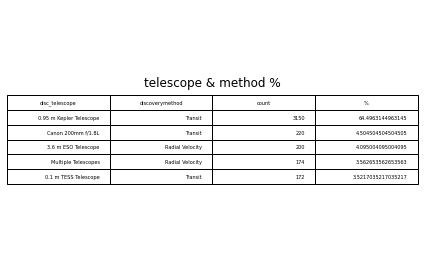

In [14]:
table_2 = disc_combination.copy()
table_2 = table_2.iloc[:5]
# plot a table of the stances count and percentages
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=table_2.values, colLabels = table_2.columns, loc='center')

# disply and save the table
name = "telescope & method %"
plt.title(name, y=1.0, pad=-80)
fig.tight_layout()
plt.savefig('./graphs/disc_telescope_method_percent.jpg', bbox_inches="tight", dpi=300)
plt.show()

Checking the combination of instrument, facility and method

In [15]:
# group and counting planets by discovery instrument and method
disc_combination_1 = confirmed_df.copy()
disc_combination_1 = disc_combination_1.groupby(['disc_facility','disc_telescope', 'discoverymethod'])['pl_name'].count()
disc_combination_1 = disc_combination_1.to_frame()
disc_combination_1.reset_index(inplace=True)
disc_combination_1.rename(columns={'pl_name':'count'}, inplace=True)
disc_combination_1['%'] = (disc_combination_1['count'] / disc_combination_1['count'].sum())*100
disc_combination_1 = disc_combination_1.sort_values(by='%', ascending=False)
disc_combination_1.reset_index(drop= True, inplace=True)
disc_combination_1

,disc_facility,disc_telescope,discoverymethod,count,%
0,Kepler,0.95 m Kepler Telescope,Transit,2673,54.729730
1,K2,0.95 m Kepler Telescope,Transit,477,9.766585
2,La Silla Observatory,3.6 m ESO Telescope,Radial Velocity,200,4.095004
3,Transiting Exoplanet Survey Satellite (TESS),0.1 m TESS Telescope,Transit,172,3.521704
4,W. M. Keck Observatory,10 m Keck I Telescope,Radial Velocity,171,3.501229
...,...,...,...,...,...
116,Infrared Survey Facility,1.4 m IRSF Telescope,Imaging,1,0.020475
117,Las Campanas Observatory,6.5 m Magellan I Baade Telescope,Imaging,1,0.020475
118,Paranal Observatory,8.2 m ESO VLT UT1 Antu Telescope,Astrometry,1,0.020475
119,Paranal Observatory,8.2 m ESO VLT UT1 Antu Telescope,Transit,1,0.020475


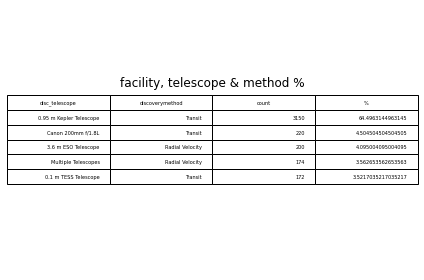

In [16]:
table_3 = disc_combination.copy()
table_3 = table_3.iloc[:5]

# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=table_3.values, colLabels = table_3.columns, loc='center')

# disply and save the table
name = "facility, telescope & method %"
plt.title(name, y=1.0, pad=-80)
fig.tight_layout()
plt.savefig('./graphs/disc_facil_telescope_method_percent.jpg', bbox_inches="tight", dpi=300)
plt.show()

The Kepler Mission and Telescope combination has discovered 54.73% of all exoplanets in the MAST archives<br>
and will be the focus of the rest of the exploritory analysis

In [17]:
# filtering out just Kepler discovered exoplanets
kep_df = confirmed_df.copy()
kep_df = kep_df[kep_df['disc_facility'].str.contains("Kepler", na=False) & 
                kep_df['discoverymethod'].str.contains("Transit", na=False) &
               ~kep_df['discoverymethod'].str.contains("Variations", na=False)]


kep_df.drop_duplicates(subset=['pl_name'])
kep_df

,pl_name,pl_letter,hostname,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,disc_facility,disc_instrument,...,pl_eqt,pl_dens,pl_trandur,pl_radj,pl_rade,pl_bmasse,st_age,st_mass,tran_flag,sy_dist
2,Kepler-276 c,c,Kepler-276,TIC 138213510,2014-02,2013,Transit,Space,Kepler,Kepler CCD Array,...,563.0,3.74,5.0990,0.259,2.900,16.60,0.40,1.10,1,1144.860
3,Kepler-829 b,b,Kepler-829,TIC 123451768,2016-05,2016,Transit,Space,Kepler,Kepler CCD Array,...,857.0,2.98,2.2442,0.188,2.110,5.10,4.68,0.98,1,1073.760
5,Kepler-477 b,b,Kepler-477,TIC 158633329,2016-05,2016,Transit,Space,Kepler,Kepler CCD Array,...,649.0,3.06,3.3296,0.185,2.070,4.94,2.09,0.87,1,367.000
20,Kepler-1390 b,b,Kepler-1390,TIC 264508835,2016-05,2016,Transit,Space,Kepler,Kepler CCD Array,...,934.0,5.89,3.2110,0.105,1.180,1.76,4.47,0.98,1,723.431
21,Kepler-393 c,c,Kepler-393,TIC 159580535,2014-03,2014,Transit,Space,Kepler,Kepler CCD Array,...,901.0,5.44,5.4010,0.119,1.330,2.33,2.15,1.21,1,881.404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872,Kepler-1896 b,b,Kepler-1896,TIC 394175334,2021-11,2021,Transit,Space,Kepler,Kepler CCD Array,...,536.0,1.81,4.1990,0.277,3.099,9.80,NaN,1.07,1,1732.910
4873,Kepler-1897 b,b,Kepler-1897,TIC 138645719,2021-11,2021,Transit,Space,Kepler,Kepler CCD Array,...,505.0,2.05,3.2710,0.251,2.814,8.32,4.20,0.86,1,983.174
4874,Kepler-1899 b,b,Kepler-1899,TIC 137348756,2021-11,2021,Transit,Space,Kepler,Kepler CCD Array,...,851.0,4.45,1.7040,0.138,1.551,3.02,13.90,0.76,1,711.509
4875,Kepler-1904 b,b,Kepler-1904,TIC 299089587,2021-11,2021,Transit,Space,Kepler,Kepler CCD Array,...,567.0,5.13,0.9490,0.124,1.390,2.51,1.20,0.53,1,270.854


#### Discovery Years

Plotting the years of discovered planets by Kepler Mission, Kepler launched <br>
on March 7, 2009 and ran until October 30, 2018

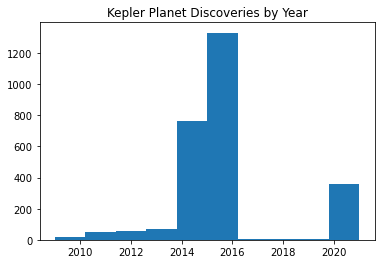

In [18]:
plt.subplot()
plt.hist(kep_df['disc_year'])
plt.title('Kepler Planet Discoveries by Year')


plt.savefig('./graphs/kep_disc_by_year.jpg', bbox_inches="tight", dpi=450)
plt.show()

#### Exoplanet Orbital Period

Plotting the distributions of Orbital Periods

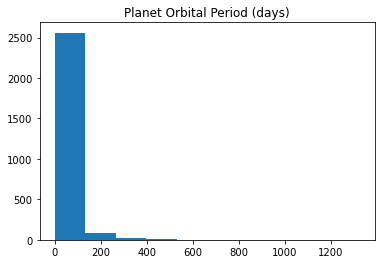

In [19]:
plt.subplot()
plt.hist(kep_df['pl_orbper'])
plt.title('Planet Orbital Period (days)')


plt.savefig('./graphs/planet_orbital_period.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [20]:
orbital_period_stats = kep_df['pl_orbper'].describe()
orbital_period_stats = orbital_period_stats.to_frame()
orbital_period_stats.reset_index(inplace=True)
orbital_period_stats.rename(columns={'index':'Stat', 'pl_orbper':'Value'}, inplace=True)
orbital_period_stats

,Stat,Value
0,count,2673.000000
1,mean,30.753326
2,std,75.882054
3,min,0.355007
4,25%,5.194922
5,50%,11.555300
6,75%,27.082511
7,max,1322.300000


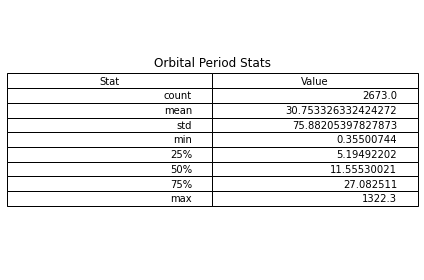

In [21]:
# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=orbital_period_stats.values, colLabels = orbital_period_stats.columns, loc='center')

# disply and save the table
name = "Orbital Period Stats"
plt.title(name, y=1.0, pad=-60)
fig.tight_layout()
plt.savefig('./graphs/orbital_period_stats.jpg', bbox_inches="tight", dpi=300)
plt.show()

#### Exoplanet Equilibrium Temperatures

Plotting the distribution of temperatures in Kelvin

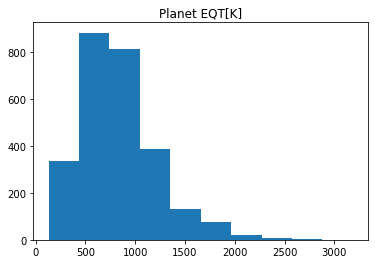

In [22]:
plt.subplot()
plt.hist(kep_df['pl_eqt'])
plt.title('Planet EQT[K]')


plt.savefig('./graphs/planet_temps.jpg', bbox_inches="tight", dpi=450)
plt.show()

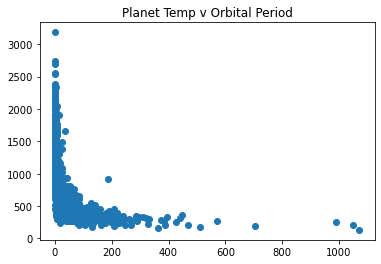

In [23]:
# scatter plot of orbital period and temp
x = kep_df['pl_orbper']
y = kep_df['pl_eqt']

plt.scatter(x, y)
plt.title('Planet Temp v Orbital Period')
plt.savefig('./graphs/planet_temp_orbital_period_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

#### Exoplanet Density

Plotting the density of exoplanets in (g/cm**3)

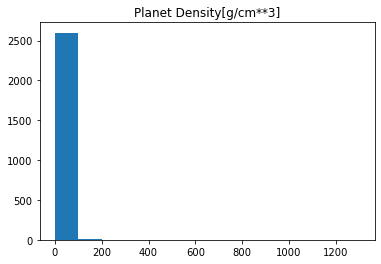

In [24]:
# hostogram of planet desnities
plt.subplot()
data = kep_df['pl_dens']
plt.hist(data, bins=np.arange(min(data), max(data) + 100, 100))
plt.title('Planet Density[g/cm**3]')


plt.savefig('./graphs/planet_density.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [25]:
max_density = kep_df['pl_dens'].max()
max_density

1290.0

In [26]:
min_density = kep_df['pl_dens'].min()
min_density

0.03

In [27]:
mode_density = kep_df['pl_dens'].mode()
mode_density

0    4.99
1    5.71
dtype: float64

In [28]:
median_density = kep_df['pl_dens'].median()
median_density

3.065

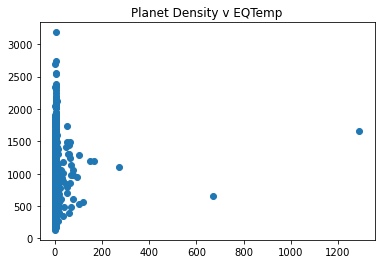

In [29]:
# scatter plot of density and temp
x = kep_df['pl_dens']
y = kep_df['pl_eqt']

plt.scatter(x, y)
plt.title('Planet Density v EQTemp')
plt.savefig('./graphs/planet_density_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

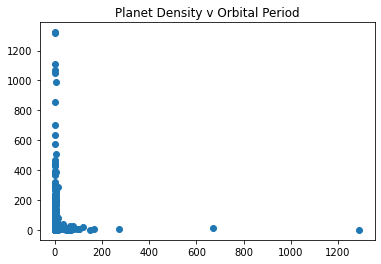

In [30]:
# scatter plot of density and orbital period
x = kep_df['pl_dens']
y = kep_df['pl_orbper']

plt.scatter(x, y)
plt.title('Planet Density v Orbital Period')
plt.savefig('./graphs/planet_density_orb_period_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [31]:
earth_density_stats = kep_df['pl_dens'].describe()
earth_density_stats = earth_density_stats.to_frame()
earth_density_stats.reset_index(inplace=True)
earth_density_stats.rename(columns={'index':'Stat', 'pl_dens':'Value'}, inplace=True)
earth_density_stats

,Stat,Value
0,count,2606.000000
1,mean,5.092675
2,std,29.954707
3,min,0.030000
4,25%,2.050000
5,50%,3.065000
6,75%,4.770000
7,max,1290.000000


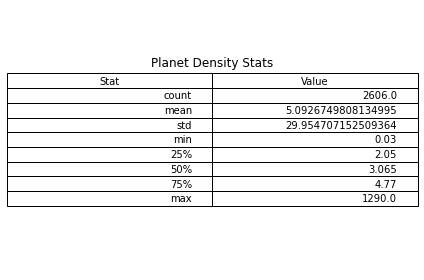

In [32]:
# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=earth_density_stats.values, colLabels = earth_density_stats.columns, loc='center')

# disply and save the table
name = "Planet Density Stats"
plt.title(name, y=1.0, pad=-60)
fig.tight_layout()
plt.savefig('./graphs/planet_density_stats.jpg', bbox_inches="tight", dpi=300)
plt.show()

#### Exoplanet Transit Durations

Transit duration is set in days and is the duration for the transit across the star.

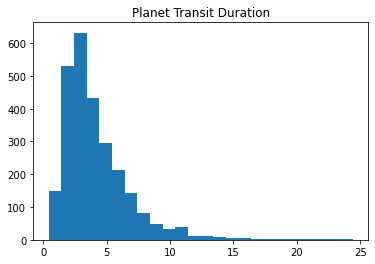

In [33]:
plt.subplot()
data = kep_df['pl_trandur']
plt.hist(data, bins=np.arange(min(data), max(data) + 1, 1))
plt.title('Planet Transit Duration')


plt.savefig('./graphs/kep_transit_durations.jpg', bbox_inches="tight", dpi=450)
plt.show()

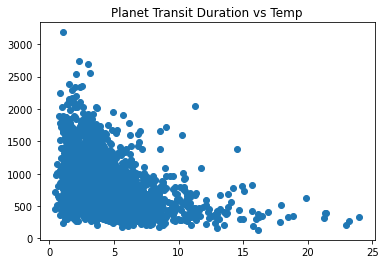

In [34]:
# checking for any relationship between the duration and the temperature
x = kep_df['pl_trandur']
y = kep_df['pl_eqt']

plt.scatter(x, y)
plt.title('Planet Transit Duration vs Temp')
plt.savefig('./graphs/planet_trans_and_temp_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

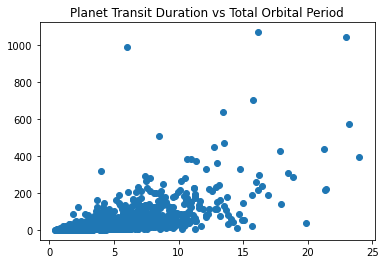

In [35]:
# checking for any relationship between the duration and the period
x = kep_df['pl_trandur']
y = kep_df['pl_orbper']

plt.scatter(x, y)
plt.title('Planet Transit Duration vs Total Orbital Period')
plt.savefig('./graphs/planet_trans_and_orbper_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

#### Exoplanet Earth Mass

The Earth Mass equivalent of the exoplanet found

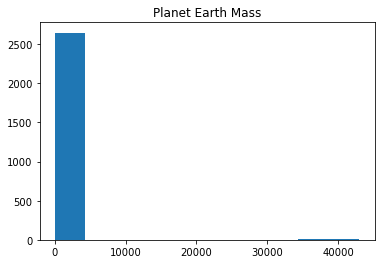

In [36]:
plt.subplot()
data = kep_df['pl_bmasse']
plt.hist(data)
plt.title('Planet Earth Mass')


plt.savefig('./graphs/kep_earth_mass.jpg', bbox_inches="tight", dpi=450)
plt.show()

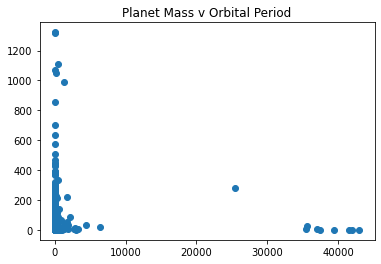

In [37]:
# scatter plot of earth mass and orbital period
x = kep_df['pl_bmasse']
y = kep_df['pl_orbper']

plt.scatter(x, y)
plt.title('Planet Mass v Orbital Period')
plt.savefig('./graphs/planet_mass_orbper_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [38]:
earth_mass_mode = kep_df['pl_bmasse'].mode()
earth_mass_mode

0    3.33
dtype: float64

In [39]:
earth_mass_min = kep_df['pl_bmasse'].min()
earth_mass_min

0.0374

In [40]:
earth_mass_max = kep_df['pl_bmasse'].max()
earth_mass_max

43000.0

In [41]:
earth_mass_mean = kep_df['pl_bmasse'].mean()
earth_mass_mean

156.51208530673722

In [42]:
earth_mass_median = kep_df['pl_bmasse'].median()
earth_mass_median

5.39

In [43]:
earth_mass_stats = kep_df['pl_bmasse'].describe()
earth_mass_stats = earth_mass_stats.to_frame()
earth_mass_stats.reset_index(inplace=True)
earth_mass_stats.rename(columns={'index':'Stat', 'pl_bmasse':'Value'}, inplace=True)
earth_mass_stats

,Stat,Value
0,count,2657.000000
1,mean,156.512085
2,std,2204.692704
3,min,0.037400
4,25%,2.890000
5,50%,5.390000
6,75%,9.010000
7,max,43000.000000


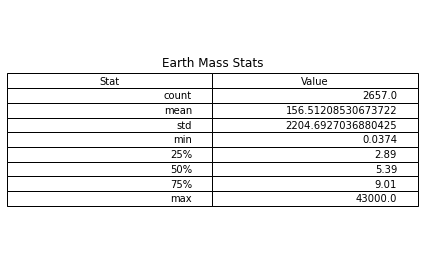

In [44]:
# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=earth_mass_stats.values, colLabels = earth_mass_stats.columns, loc='center')

# disply and save the table
name = "Earth Mass Stats"
plt.title(name, y=1.0, pad=-60)
fig.tight_layout()
plt.savefig('./graphs/earth_mass_stats.jpg', bbox_inches="tight", dpi=300)
plt.show()

#### Exoplanet in Jupiter Radius

Plot the Jupiter radius distributions between the exoplanets discovered

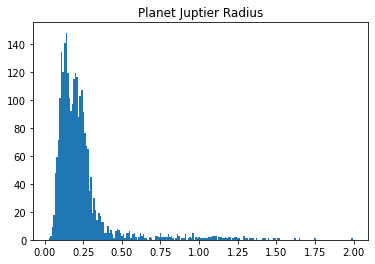

In [45]:
plt.subplot()
data = kep_df['pl_radj']
plt.hist(data, bins=np.arange(min(data), max(data) + 0.01, 0.01))
plt.title('Planet Juptier Radius')


plt.savefig('./graphs/kep_jupiter_radius.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [46]:
jupiter_radius_stats = kep_df['pl_radj'].describe()
jupiter_radius_stats = jupiter_radius_stats.to_frame()
jupiter_radius_stats.reset_index(inplace=True)
jupiter_radius_stats.rename(columns={'index':'Stat', 'pl_radj':'Value'}, inplace=True)
jupiter_radius_stats

,Stat,Value
0,count,2673.000000
1,mean,0.238951
2,std,0.206891
3,min,0.026000
4,25%,0.133000
5,50%,0.192000
6,75%,0.256000
7,max,1.990000


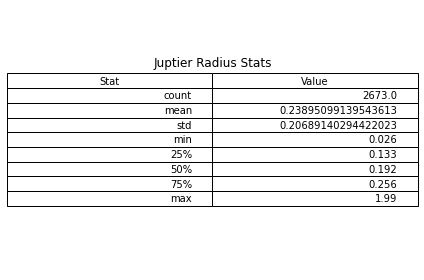

In [47]:
# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=jupiter_radius_stats.values, colLabels = jupiter_radius_stats.columns, loc='center')

# disply and save the table
name = "Juptier Radius Stats"
plt.title(name, y=1.0, pad=-60)
fig.tight_layout()
plt.savefig('./graphs/jupiter_radius_stats.jpg', bbox_inches="tight", dpi=300)
plt.show()

#### Exoplanet in Earth Radius

Plot the Earth radius distributions between the exoplanets discovered

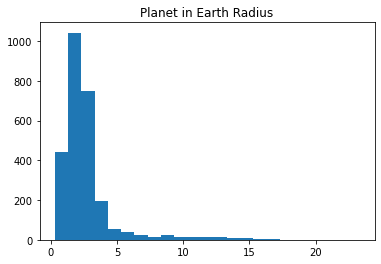

In [48]:
plt.subplot()
data = kep_df['pl_rade']
plt.hist(data, bins=np.arange(min(data), max(data) + 1, 1))
plt.title('Planet in Earth Radius')


plt.savefig('./graphs/kep_earth_radius.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [49]:
earth_radius_stats = kep_df['pl_rade'].describe()
earth_radius_stats = earth_radius_stats.to_frame()
earth_radius_stats.reset_index(inplace=True)
earth_radius_stats.rename(columns={'index':'Stat', 'pl_rade':'Value'}, inplace=True)
earth_radius_stats

,Stat,Value
0,count,2673.000000
1,mean,2.678313
2,std,2.319057
3,min,0.296000
4,25%,1.490000
5,50%,2.150000
6,75%,2.870000
7,max,22.310000


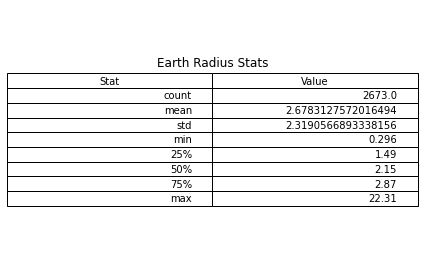

In [50]:
# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=earth_radius_stats.values, colLabels = earth_radius_stats.columns, loc='center')

# disply and save the table
name = "Earth Radius Stats"
plt.title(name, y=1.0, pad=-60)
fig.tight_layout()
plt.savefig('./graphs/earth_radius_stats.jpg', bbox_inches="tight", dpi=300)
plt.show()

#### Stellar Age

The stellar ages of stars hosting known exoplanets

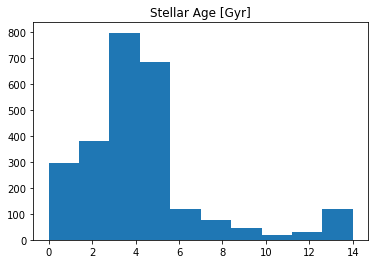

In [51]:
# plot a histogram to visualise distribution
plt.subplot()
data = kep_df['st_age']
plt.hist(data)
plt.title('Stellar Age [Gyr]')


plt.savefig('./graphs/stellar_age.jpg', bbox_inches="tight", dpi=450)
plt.show()

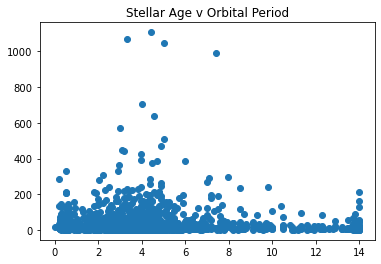

In [52]:
# scatter plot of stellar age and orbital period
x = kep_df['st_age']
y = kep_df['pl_orbper']

plt.scatter(x, y)
plt.title('Stellar Age v Orbital Period')
plt.savefig('./graphs/stellar_age_orbper_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

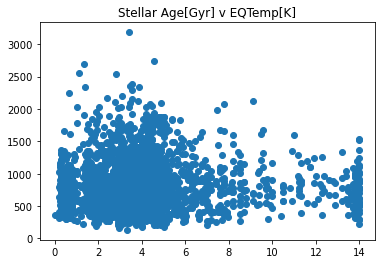

In [53]:
# scatter plot of stellar age and temp
x = kep_df['st_age']
y = kep_df['pl_eqt']

plt.scatter(x, y)
plt.title('Stellar Age[Gyr] v EQTemp[K]')
plt.savefig('./graphs/stellar_age_temp_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

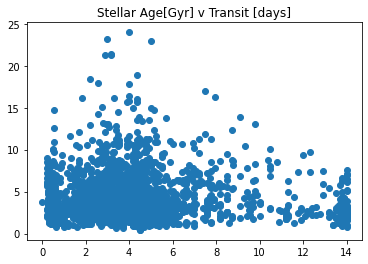

In [54]:
# scatter plot of stellar age and transit duration
x = kep_df['st_age']
y = kep_df['pl_trandur']

plt.scatter(x, y)
plt.title('Stellar Age[Gyr] v Transit [days]')
plt.savefig('./graphs/stellar_age_transit_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

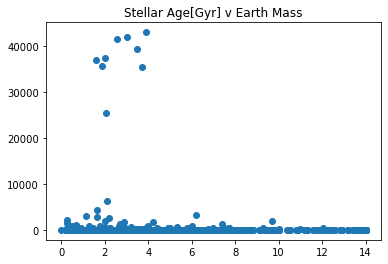

In [55]:
# scatter plot of stellar age and transit duration
x = kep_df['st_age']
y = kep_df['pl_bmasse']

plt.scatter(x, y)
plt.title('Stellar Age[Gyr] v Earth Mass')
plt.savefig('./graphs/stellar_age_earthMass_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [56]:
stellar_age_stats = kep_df['st_age'].describe()
stellar_age_stats = stellar_age_stats.to_frame()
stellar_age_stats.reset_index(inplace=True)
stellar_age_stats.rename(columns={'index':'Stat', 'st_age':'Value'}, inplace=True)
stellar_age_stats

,Stat,Value
0,count,2568.000000
1,mean,4.233917
2,std,2.932827
3,min,0.000000
4,25%,2.690000
5,50%,3.890000
6,75%,4.680000
7,max,14.000000


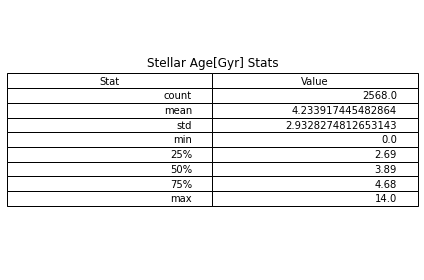

In [57]:
# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=stellar_age_stats.values, colLabels = stellar_age_stats.columns, loc='center')

# disply and save the table
name = "Stellar Age[Gyr] Stats"
plt.title(name, y=1.0, pad=-60)
fig.tight_layout()
plt.savefig('./graphs/stellar_age_stats.jpg', bbox_inches="tight", dpi=300)
plt.show()

#### Stellar Mass

The stellar mass (also known as Solar Mass) of stars hosting known exoplanets


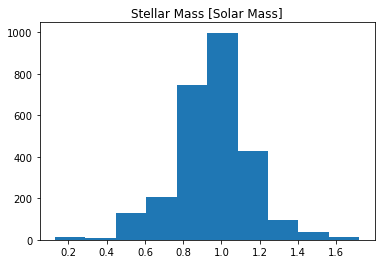

In [59]:
# plot a histogram to visualise distribution
plt.subplot()
data = kep_df['st_mass']
plt.hist(data)
plt.title('Stellar Mass [Solar Mass]')


plt.savefig('./graphs/stellar_mass.jpg', bbox_inches="tight", dpi=450)
plt.show()

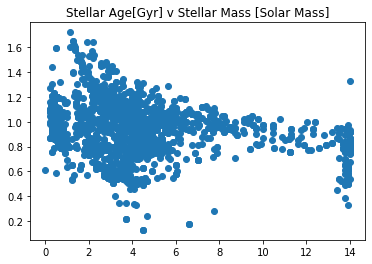

In [60]:
# scatter plot of stellar age and stellar mass
x = kep_df['st_age']
y = kep_df['st_mass']

plt.scatter(x, y)
plt.title('Stellar Age[Gyr] v Stellar Mass [Solar Mass]')
plt.savefig('./graphs/stellar_age_stealler_mass_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

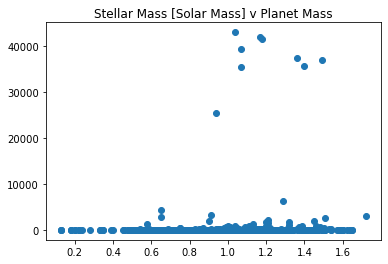

In [63]:
# scatter plot of planet mass and stellar mass
x = kep_df['st_mass']
y = kep_df['pl_bmasse']

plt.scatter(x, y)
plt.title('Stellar Mass [Solar Mass] v Planet Mass')
plt.savefig('./graphs/stealler_mass__planet_mass_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [64]:
stellar_mass_stats = kep_df['st_mass'].describe()
stellar_mass_stats = stellar_mass_stats.to_frame()
stellar_mass_stats.reset_index(inplace=True)
stellar_mass_stats.rename(columns={'index':'Stat', 'st_mass':'Value'}, inplace=True)
stellar_mass_stats

,Stat,Value
0,count,2673.000000
1,mean,0.951104
2,std,0.196974
3,min,0.130000
4,25%,0.840000
5,50%,0.960000
6,75%,1.070000
7,max,1.720000


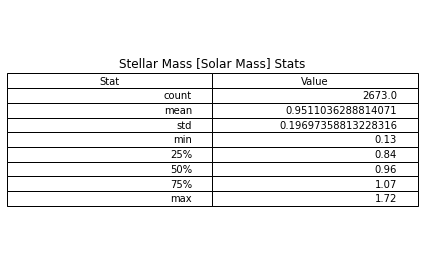

In [65]:
# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=stellar_mass_stats.values, colLabels = stellar_mass_stats.columns, loc='center')

# disply and save the table
name = "Stellar Mass [Solar Mass] Stats"
plt.title(name, y=1.0, pad=-60)
fig.tight_layout()
plt.savefig('./graphs/stellar_mass_stats.jpg', bbox_inches="tight", dpi=300)
plt.show()

#### System Distance

The Parsec distance to the host of the exoplanet

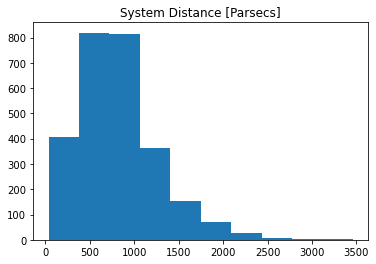

In [66]:
# plot a histogram to visualise distribution
plt.subplot()
data = kep_df['sy_dist']
plt.hist(data)
plt.title('System Distance [Parsecs]')


plt.savefig('./graphs/system_distance.jpg', bbox_inches="tight", dpi=450)
plt.show()

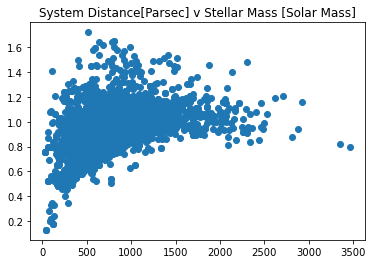

In [67]:
# scatter plot of system distance and stellar mass
x = kep_df['sy_dist']
y = kep_df['st_mass']

plt.scatter(x, y)
plt.title('System Distance[Parsec] v Stellar Mass [Solar Mass]')
plt.savefig('./graphs/system_distance_steller_mass_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

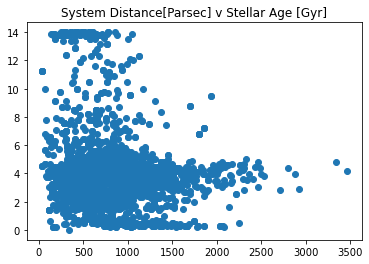

In [68]:
# scatter plot of system distance and stellar age
x = kep_df['sy_dist']
y = kep_df['st_age']

plt.scatter(x, y)
plt.title('System Distance[Parsec] v Stellar Age [Gyr]')
plt.savefig('./graphs/system_distance_steller_age_scatter.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [69]:
stellar_distance_stats = kep_df['sy_dist'].describe()
stellar_distance_stats = stellar_distance_stats.to_frame()
stellar_distance_stats.reset_index(inplace=True)
stellar_distance_stats.rename(columns={'index':'Stat', 'sy_dist':'Value'}, inplace=True)
stellar_distance_stats

,Stat,Value
0,count,2663.000000
1,mean,818.424865
2,std,449.332459
3,min,36.439600
4,25%,486.360000
5,50%,769.096000
6,75%,1047.030000
7,max,3460.510000


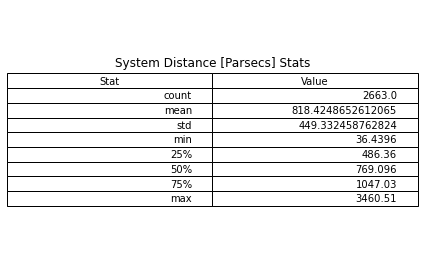

In [70]:
# plot a table 
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=stellar_distance_stats.values, colLabels = stellar_distance_stats.columns, loc='center')

# disply and save the table
name = "System Distance [Parsecs] Stats"
plt.title(name, y=1.0, pad=-60)
fig.tight_layout()
plt.savefig('./graphs/system_distance_stats.jpg', bbox_inches="tight", dpi=300)
plt.show()